### Introduction

Project name: analysis of the advertising strategy of an entertainment application

Description: The project analyzes data on attracted users and advertising companies in order to adjust the advertising strategy. To do this, the RT, CR, LTV, ROI and CAC indicators are analyzed in dynamics and broken down by cohorts.

Purpose: To discover the reasons for the inefficiency of advertising and give recommendations to the marketing department

Tasks: 
- Prepare data for analysis
- Explore customer profiles
- Explore the sources of user engagement and their CAC
- Calculate business indicators and study the payback of advertising
- Identify the reasons for the inefficiency of advertising
- Find promising channels and formulate recommendations for the marketing department

The initial data for analysis includes:
- visits_info_short.csv table describing site visits by users and basic information about them;
- The orders_info_short.csv table describing information about customer orders
- The costs_info_short.csv table describing information about advertising campaigns.

The data analysis plan is to solve the project tasks in stages.

### Loading data and preparing for analysis

In [1]:
# connecting libraries
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from matplotlib import pyplot as plt


In [2]:
# uploading data
try:
    visits = pd.read_csv('/Users/glebderabin/Documents/Учеба Китай/1 Theses/CV + docs/pract repo/Business metrics analysis/visits_info_short.csv')
    orders = pd.read_csv('/Users/glebderabin/Documents/Учеба Китай/1 Theses/CV + docs/pract repo/Business metrics analysis/orders_info_short.csv')
    costs = pd.read_csv('/Users/glebderabin/Documents/Учеба Китай/1 Theses/CV + docs/pract repo/Business metrics analysis/costs_info_short.csv')

except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

# studying the data
for i in [visits, orders, costs]:
    print('top of the table')
    display(i.head())
    print('number of values and type')
    display(i.info())
    print('statistics')
    display(i.describe())

top of the table


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

number of values and type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

statistics


User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

top of the table


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

number of values and type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

statistics


User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

top of the table


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

number of values and type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

statistics


costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

There are no gaps in the visits table, you need to change the format of Session Start and Session End. There are also no gaps in the orders table, you need to change the Event Dt format. There are no omissions in the costs table, you need to bring the date in accordance. format. You should also bring the names of fields in all tables to a "snake" appearance. The minimum and maximum values of the fields do not contain anomalies. Also, the tables need to be checked for duplicate rows.

In [3]:
# renaming the fields
visits = visits.rename({'User Id': 'user_id', 'Region': 'region',
                        'Device': 'device', 'Channel': 'channel',
                        'Session Start': 'session_start', 'Session End': 'session_end'}, axis='columns')
orders = orders.rename({'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'}, axis='columns')
costs = costs.rename({'Channel': 'channel'}, axis='columns')

# I'm putting the date in the correct format
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# Checking duplicates
for i in [visits, orders, costs]:
    print(i.duplicated().sum())


0
0
0


There are no gaps, there are no duplicates, the type of fields is correct, the names are beautiful. The data is preprocessed and you can move on.

### I set functions for calculating and analyzing TV, ROI, retention and conversion.

In [4]:
# function for creating user profiles

def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
#     for event in event_names:
#         if event in events['event_name'].unique():
#             profiles[event] = profiles['user_id'].isin(
#                 events.query('event_name == @event')['user_id'].unique()
#             )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [5]:
# function for calculating retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [6]:

# conversion calculation function

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [7]:
# function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [8]:
# function for smoothing the frame

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [9]:
# function for visualizing retention

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [10]:
# conversion visualization function

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [11]:
# function for LTV and ROI visualization

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Research data analysis

In [12]:
# getting user profiles
profiles = get_profiles(visits, orders, costs)

# we determine the minimum and maximum dates for attracting users
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()

# looking at the results
print(f'Minimum user engagement date: {min_date}')
print(f'Maximum user engagement date: {max_date}')
display(profiles.head())


Minimum user engagement date: 2019-05-01
Maximum user engagement date: 2019-10-27


user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769

A table with user profiles has been compiled, in which the time of the first session, the channel of attraction, the type of device, the region, the type of paying/non-paying and the cost of attraction are reflected for each user. User engagement started on 2019-05-01, the latest engagement is 2019-10-27

In [13]:
# list of countries from which users come
print(f'list of countries from which users come: {profiles["region"].unique()}')

# find out which country has the most paying users
display(profiles.groupby('region')
        .agg({'payer': 'sum'})
        .sort_values(by='payer', ascending=False)
        .head(1))

# we are building a table reflecting the number of users and the share of those paying from each country
display(profiles.groupby('region')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
)

list of countries from which users come: ['United States' 'France' 'Germany' 'UK']


payer
region              
United States   6902

user_id     payer
region                          
United States   100002  0.069019
Germany          14981  0.041119
UK               17575  0.039829
France           17450  0.037994

The application is used by users from the United States, France, Germany, and UK. The most paying users are from the United States country. This is confirmed by the table - there are significantly more users in the USA and the share of paying users is also the highest.

In [14]:
# We find out what devices customers use
print(f'List of user devices: {profiles["device"].unique()}')

# Finding out which devices are preferred by paying users
display(profiles.groupby('device')
        .agg({'payer': 'sum'})
        .sort_values(by='payer', ascending=False)
        .head(1))

# We are building a table reflecting the number of users and the share of payers for each device
display(profiles.groupby('device')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
)

List of user devices: ['Mac' 'iPhone' 'PC' 'Android']


payer
device       
iPhone   3382

user_id     payer
device                    
Mac        30042  0.063644
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468

Users of the application use Mac, iPhone, PC and Android. Paying users prefer to use iPhone phones. iPhone users are the most, users are evenly distributed across other platforms. The highest proportion of paying users is on the Mac platform, followed by the iPhone.

In [15]:
# We find out the advertising sources of attraction
print(f'sources of attraction: {profiles["channel"].unique()}')

# We find out the channels from which the most paying users came
display(profiles.groupby('channel')
        .agg({'payer': 'sum'})
        .sort_values(by='payer', ascending=False)
        .head())

# We are building a table reflecting the number of users and the share of payers for each attraction channel
display(profiles.groupby('channel')
    .agg({'user_id': 'nunique', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
)

sources of attraction: ['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


payer
channel              
FaceBoom         3557
TipTop           1878
organic          1160
WahooNetBanner    453
AdNonSense        440

user_id     payer
channel                              
FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700
TipTop                19561  0.096007
RocketSuperAds         4448  0.079137
WahooNetBanner         8553  0.052964
YRabbit                4312  0.038265
MediaTornado           4364  0.035747
LeapBob                8553  0.030633
OppleCreativeMedia     8605  0.027077
organic               56439  0.020553

Users come to the app from the following advertising channels: Facebook, Ad Non Sense, Y Rabbit,Media Tornado, RocketSuperAds, Leapbob, TipTop, WahooNetBanner, OppleCreativeMedia,lambdaMediaAds. Also, users find the application on their own - organic.

Most of the paying users came from Facebook and TipTop channels. Organic users are in 3rd place.

In absolute numbers, most users found the app on their own. The first of the advertising channels by number of users is Facebook. The same channel attracts the most paying users, their share is 0.12. The share of channels varies significantly, almost by an order of magnitude.

### Marketing

In [16]:
# we calculate the total amount of marketing expenses
print(f'total amount of marketing expenses: {profiles["acquisition_cost"].sum()}')
# let's double check ourselves
print(costs['costs'].sum())

total amount of marketing expenses: 105497.29999999999
105497.30000000002


The total amount of marketing expenses in the study period was 105497.29

In [17]:
# I find out how the expenses are distributed by advertising sources,
# that is, how much money was spent on each source

display(
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'sum'})
    .sort_values(by='acquisition_cost', ascending=False)
)

acquisition_cost
channel                             
TipTop                      54751.30
FaceBoom                    32445.60
WahooNetBanner               5151.00
AdNonSense                   3911.25
OppleCreativeMedia           2151.25
RocketSuperAds               1833.00
LeapBob                      1797.60
lambdaMediaAds               1557.60
MediaTornado                  954.48
YRabbit                       944.22
organic                         0.00

Most of the money was spent on advertising in Tip Top and Facebook sources, the rest go by a large margin. Least of all on YRabbit and Media Tornado. Organic traffic gets for free :)

/var/folders/d_/h_gd8hg578s_9c98zbhv0wqh0000gn/T/ipykernel_36317/2317071972.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  costs.pivot_table(index = col, columns = 'channel', values = 'costs', aggfunc = 'sum').plot.area(ax = plt.subplot(1, 2, i + 1))


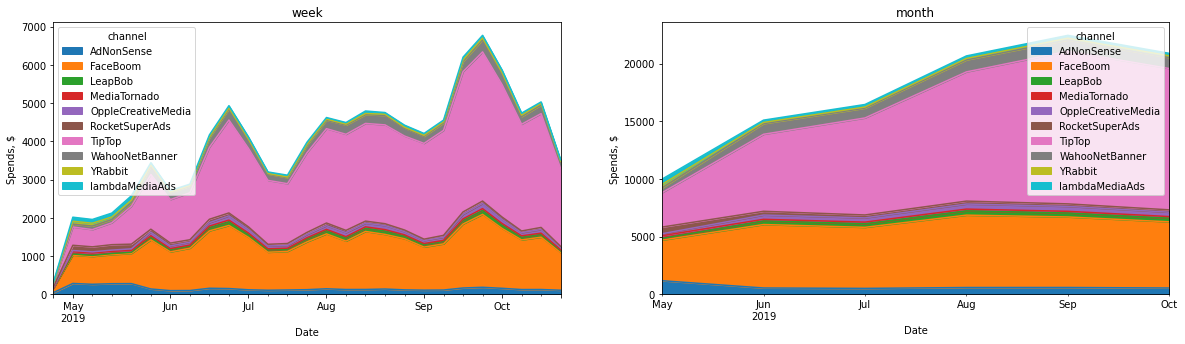

In [18]:
# Let's build a visualization of the dynamics of changes in expenses over time (by weeks and months)
# for each source

costs['week'] = costs['dt'].astype('datetime64[W]')
costs['month'] = costs['dt'].astype('datetime64[M]')

columns = ['week', 'month']

plt.subplots(figsize = (20, 5))
for i, col in enumerate(columns):
    costs.pivot_table(index = col, columns = 'channel', values = 'costs', aggfunc = 'sum').plot.area(ax = plt.subplot(1, 2, i + 1))
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Spends, $')

plt.show()

The graph again shows that most of the funds are spent on TipTop and Facebook channels. From May to September, the monthly advertising budget increased, in September it decreased slightly. The distribution of the budget by week is uneven, there are peaks and decreases.

In [19]:
# Find out how much it cost on average to attract one user (CAC)
# from each source using user profiles

# exclude organic users
profiles = profiles.query('channel != "organic"')

display(profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False))
print(f'Mean САС: {profiles["acquisition_cost"].mean()}')

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172

Mean САС: 1.1274813239427588


The most expensive users come from TipTop, attracting each costs 2.8. This is significantly more than attracting from the next site and more than the average value of 1.12

### Evaluation of the payback of advertising

In [20]:
# I exclude organic users
profiles = profiles.query('channel != "organic"')

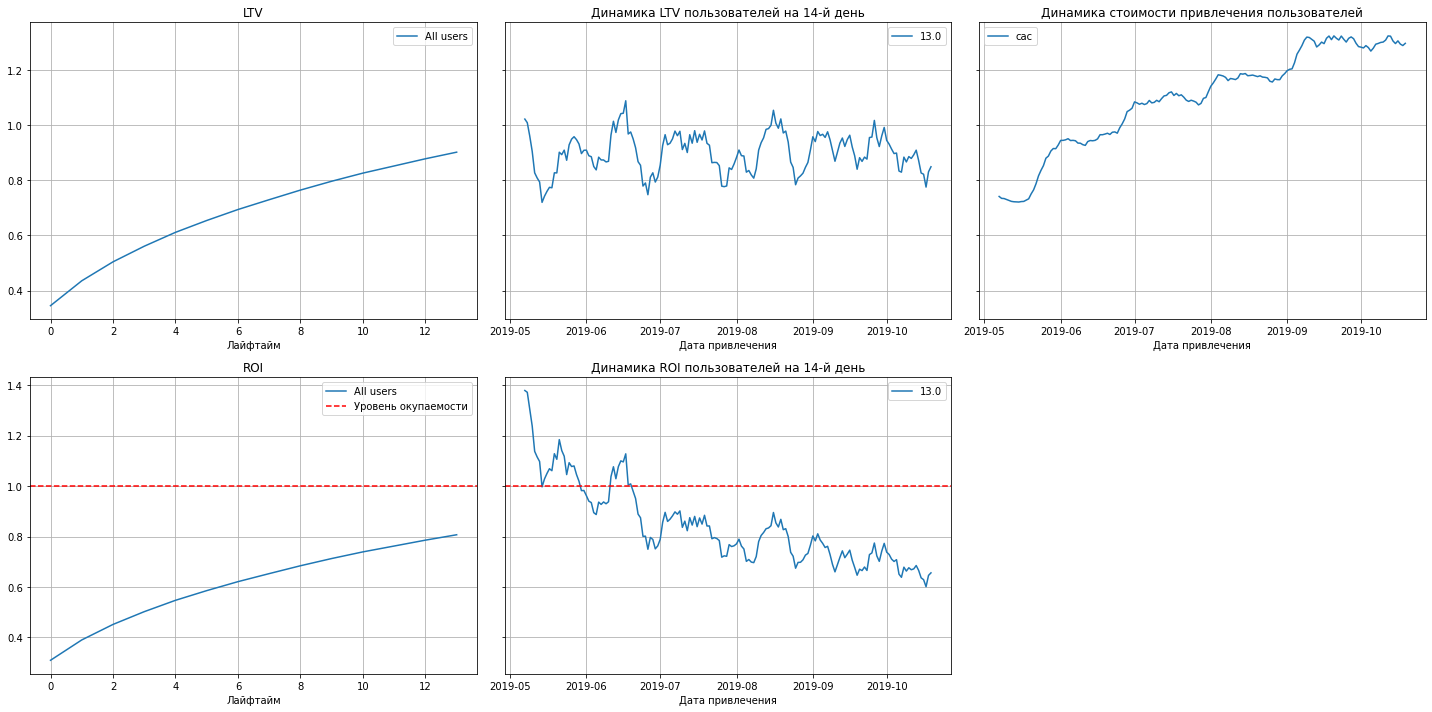

In [21]:
# I build LTV and ROI graphs and LTV, CAC and ROI dynamics graphs
# calculating indicators
ltw_raw, ltw_grouped, ltw_history, roi_grouped, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14)

# I build graphs
plot_ltv_roi(ltw_grouped, ltw_history, roi_grouped, roi_history, 14)

Advertising does not pay off in 2 weeks, since at the end of the term the ROI line does not reach one. The dynamics of SAS is unstable - the cost has increased over the observation period. LTV dynamics has seasonal fluctuations, but the level of values is stable. From the ROI dynamics chart, it follows that in the beginning, the payback of advertising was on top, and it paid off until the end of June. In July, there was a rise and the advertising paid off, but after mid-July, the ROI crossed 1 down and did not rise higher. Perhaps the ROI has fallen due to the growth of the CAC - similar timestamps on the charts.

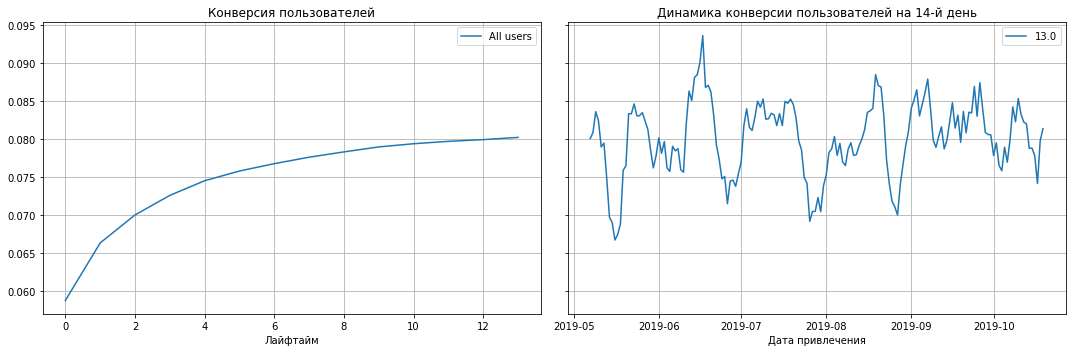

In [22]:
# building conversion charts

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14
)

plot_conversion(conversion_grouped, conversion_history, 14)


The conversion rate has normal values and grows throughout the lifetime, so it is built correctly. According to the conversion dynamics chart, it can be seen that it increased sharply in early June - when the CAC increased and the ROI decreased. The conversion rate is quite unstable.

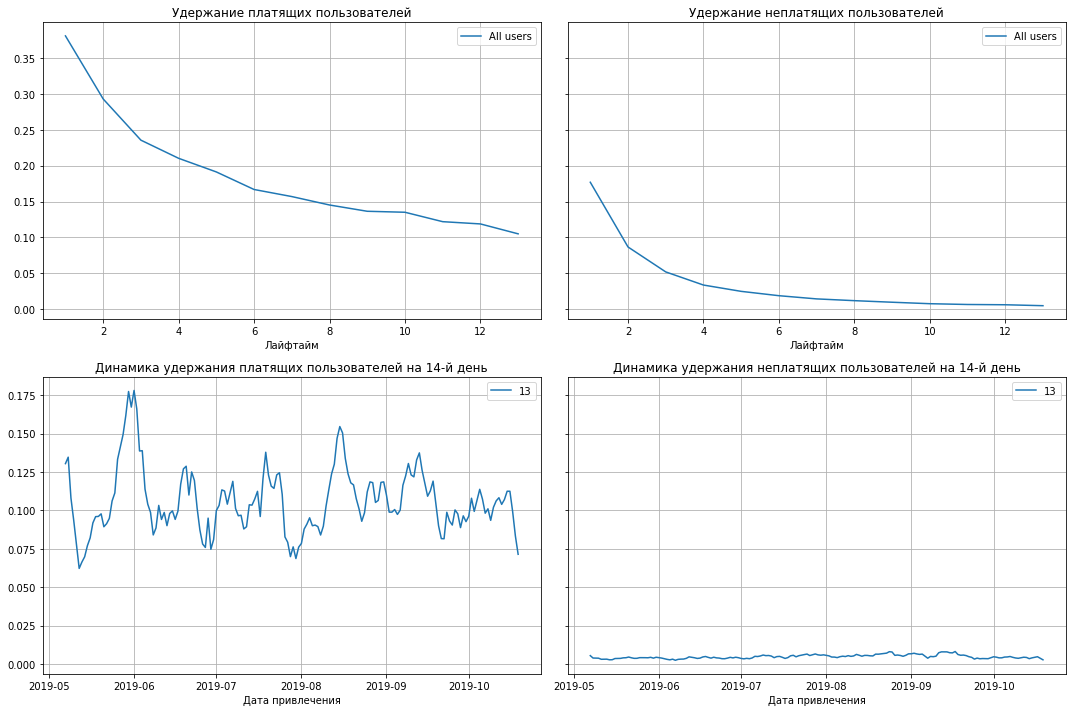

In [23]:
# building retention schedules

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14
)

plot_retention(retention_grouped, retention_history, 14)

The retention values for paying and non-paying users are in typical ranges. It follows from the retention dynamics that non-paying users almost do not use the application after 2 weeks, and this does not depend on the date of their attraction. Paying users remain after 2 weeks, the dynamics is unstable, with an increase in the time of attraction to the observed priod has a downward trend.

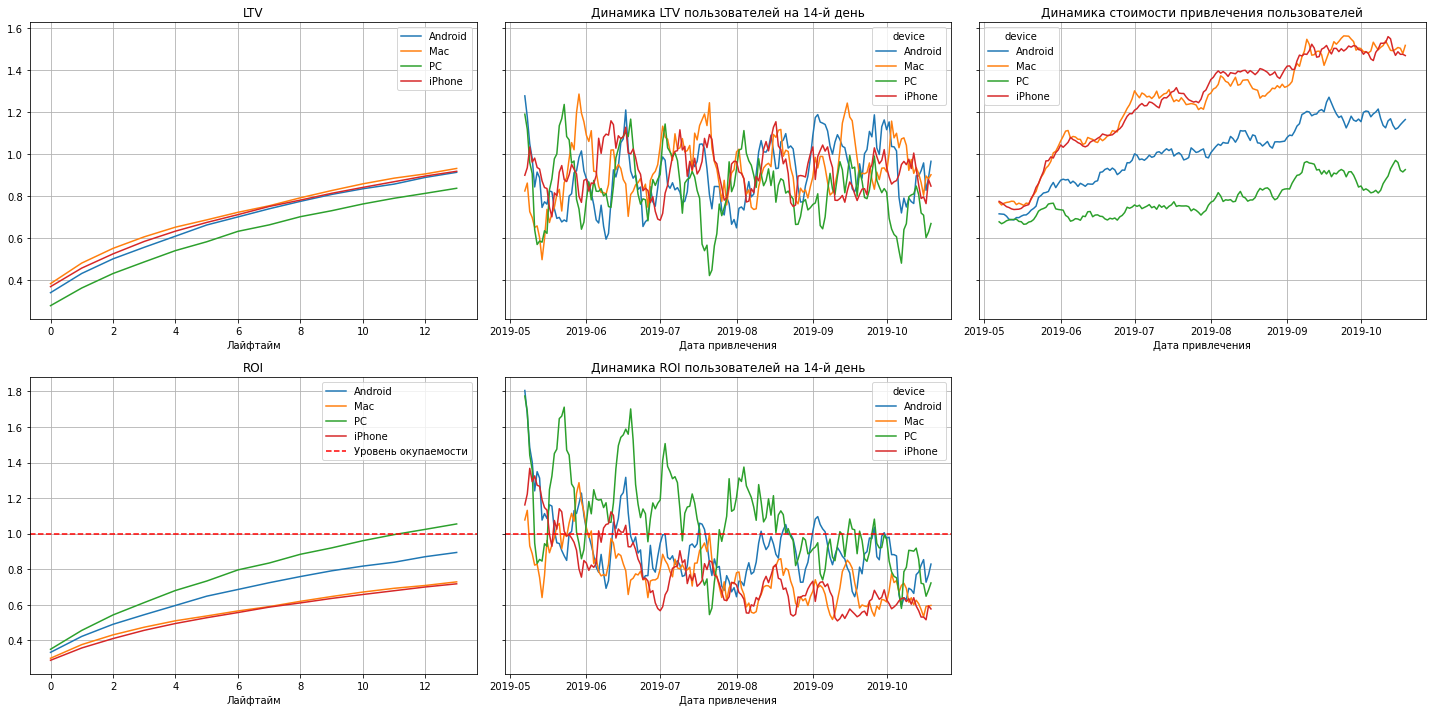

In [24]:
# Analyzing the payback of advertising by device.
# I build LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs

# I build LTV and ROI graphs and LTV, CAC and ROI dynamics graphs
# calculating indicators
ltw_raw, ltw_grouped, ltw_history, roi_grouped, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

# I build graphs
plot_ltv_roi(ltw_grouped, ltw_history, roi_grouped, roi_history, 14)

The LTV of Mac, iPhone and Android users is about the same and the highest. The dynamics of LTV for users of different platforms lies in the same range of values. The cost of attracting Mac, iPhone and Android users increased in early June 2019, but for Mac and iPhone users - most of all. The cost of attracting them at the end of the period is almost twice as much as PC users, while the gap in LTV is not so high. 

On day 14, attracting PC users pays off, the costs of attracting Android, Mac and iPhone users do not pay off. The dynamics shows that the ROI for the study period decreased almost twice for all platforms.

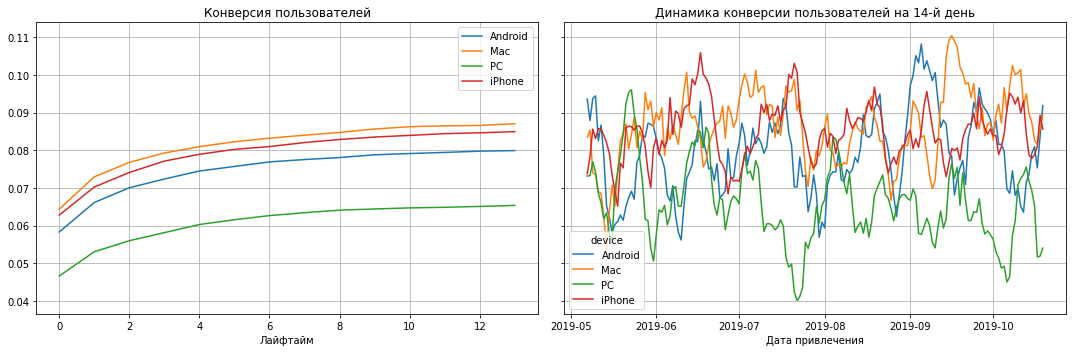

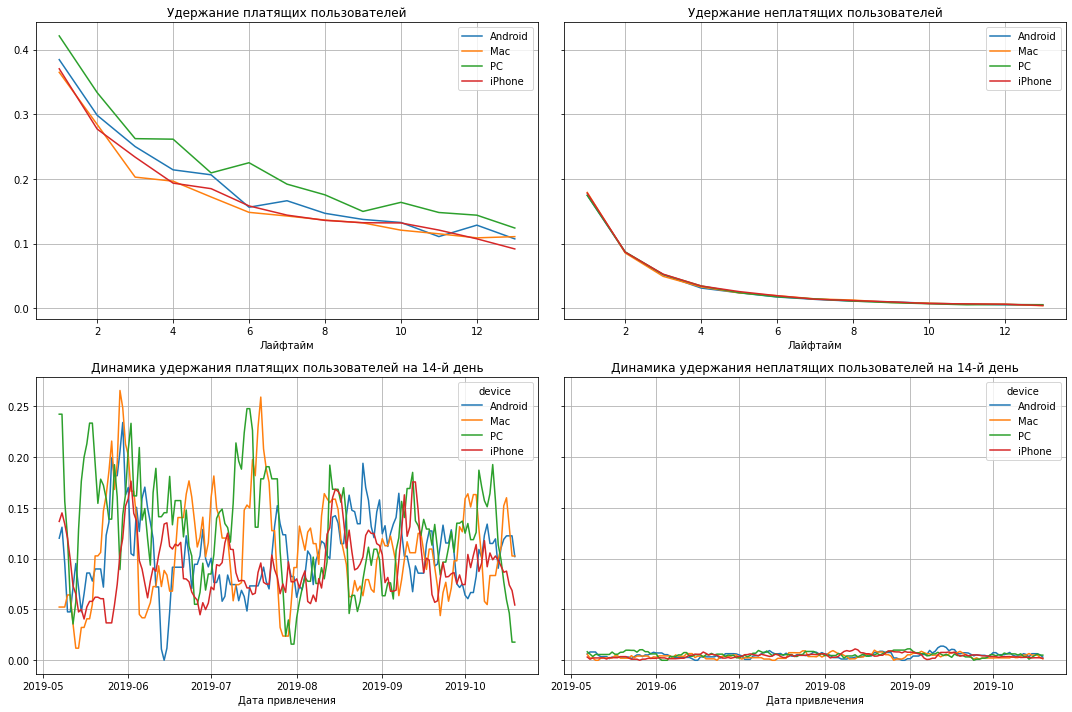

In [25]:
# I analyze conversion and retention by device.
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, 14)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, 14)

There are no strong differences between users on different platforms in terms of retention and conversion

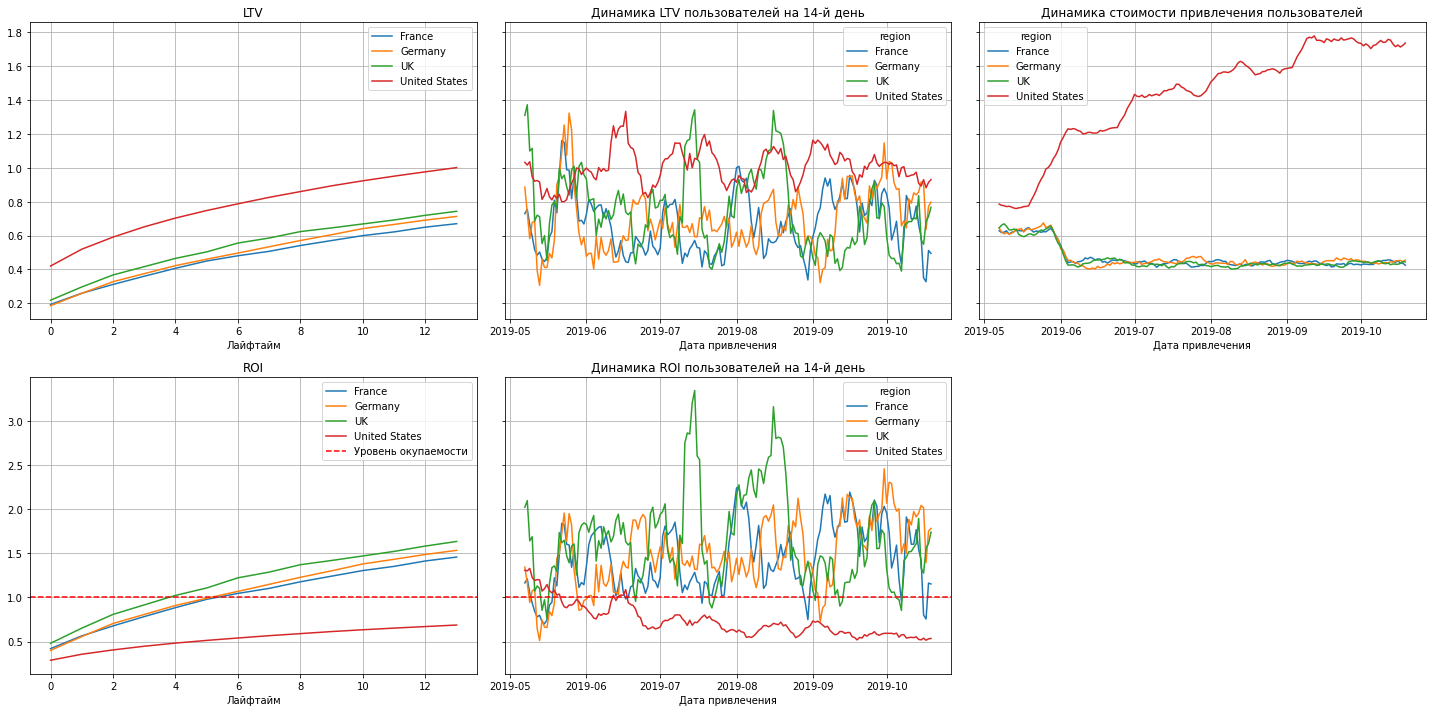

In [26]:
# Analyzing the payback of advertising by country.
# I build LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs

# I build LTV and ROI graphs and LTV, CAC and ROI dynamics graphs
# calculating indicators
ltw_raw, ltw_grouped, ltw_history, roi_grouped, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region'])

# I build graphs
plot_ltv_roi(ltw_grouped, ltw_history, roi_grouped, roi_history, 14)

It seems that the solution has been found. Users from the US bring the most money, attracting a user from the US increased sharply in June and continued to grow during the study period. At the end of the period, the cost of one user from the US is 4 times higher than a user from other regions. The ROI chart confirms that the costs of attracting users from the US do not pay off. The ROI dynamics for this region is consistently negative.

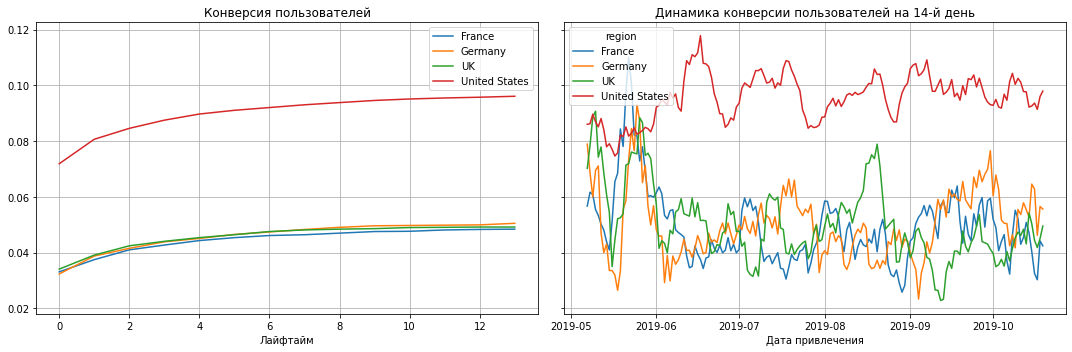

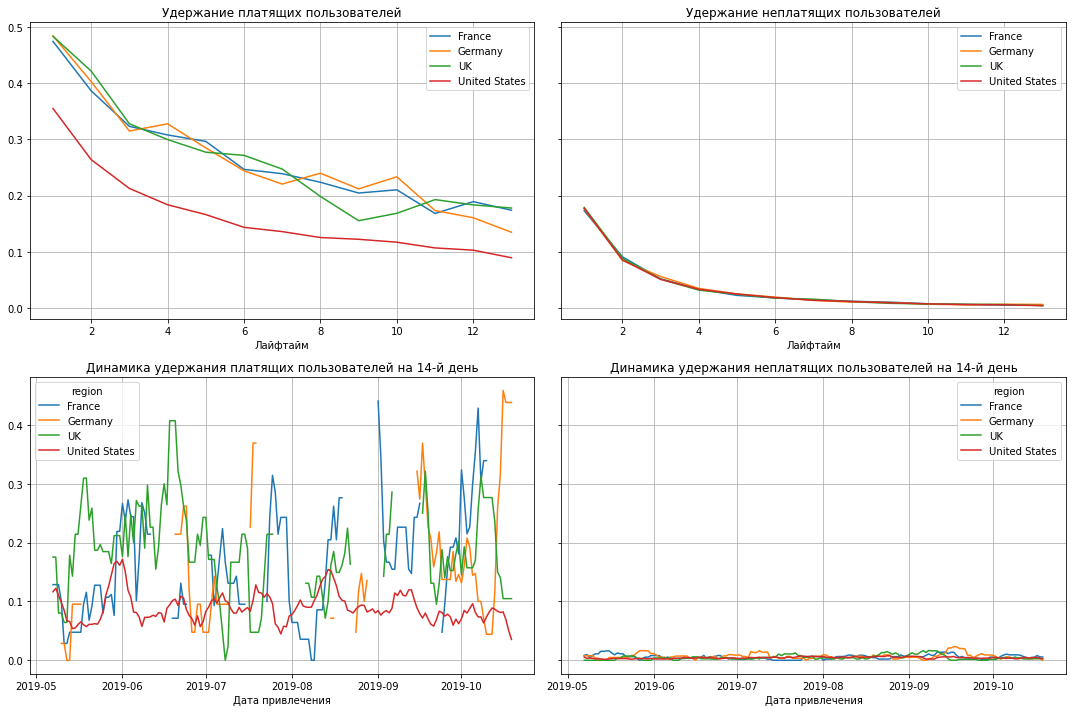

In [27]:
# Analyze conversion and retention by country.
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, 14)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, 14)

The conversion rate of users from the US is twice as high as for other countries. But the retention is lower.

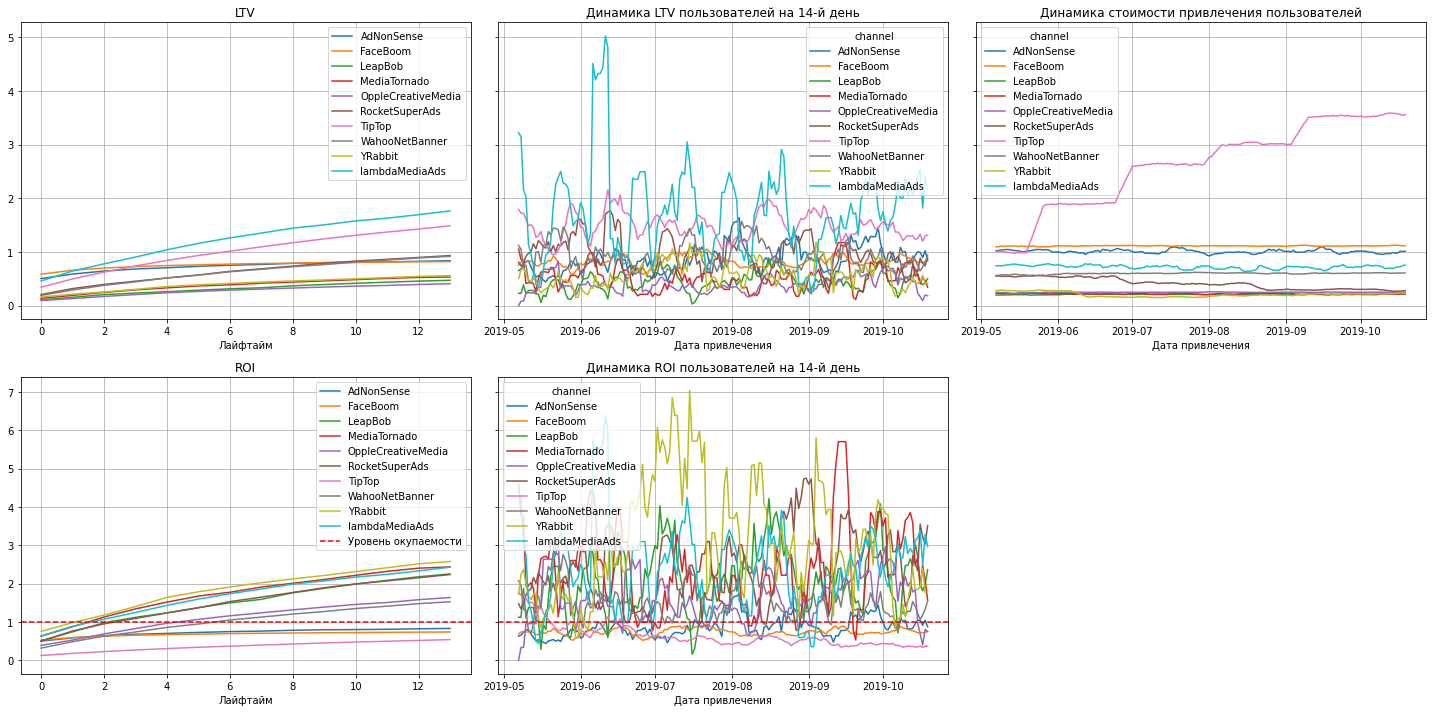

In [28]:
# Analyzing the payback of advertising by channel.
# I build LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs

# I build LTV and ROI graphs and LTV, CAC and ROI dynamics graphs
# calculating indicators
ltw_raw, ltw_grouped, ltw_history, roi_grouped, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

# I build graphs
plot_ltv_roi(ltw_grouped, ltw_history, roi_grouped, roi_history, 14)

Users from the lambda Media Ads and TipTop channels have the highest LTV by a margin from the rest. However, the cost of a user from TipTop is gradually increasing - exactly once a month, as if some commissions are increasing, unlike other channels. Advertising in three channels does not pay off: TipTop, Facebook and AdNonSense.


Answers to the questions to the section:
- In general, advertising to attract users does not pay off.
    - - The main negative impact on payback is provided by users from the US. The cost of attracting them significantly exceeds the cost of customers from other regions. Advertising for Mac and iPhone users also does not pay off, but this may also be related to the region - there are significantly more users from the USA and the distribution between devices in other regions will be normal. The TipTop channel doesn't pay off.
    - The problem with payback may be caused by a significantly increased customer price in the US region

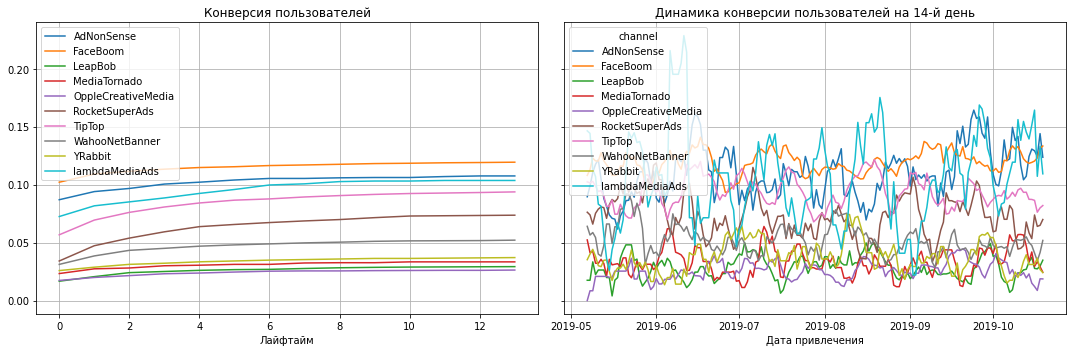

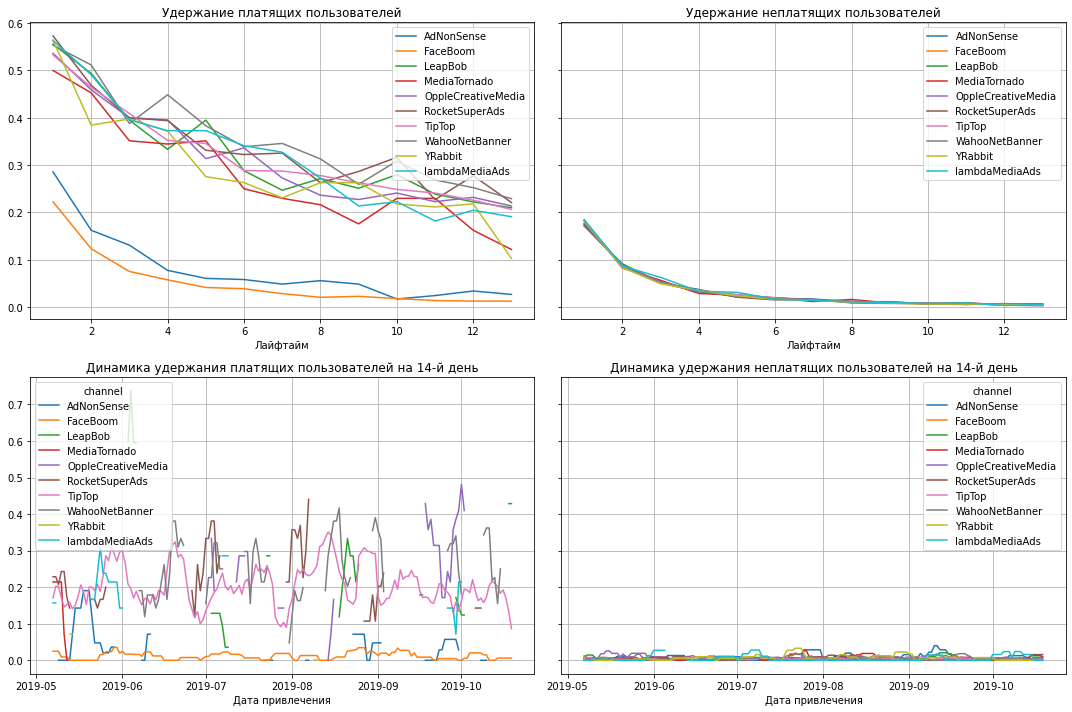

In [29]:
# Analyze conversion and retention by channel.
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, 14)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, 14)

The low retention of users from AdNonSense and Facebook channels is highlighted. Retention of paying users from these channels is at the level of non-paying users - this should not be, there are clearly problems

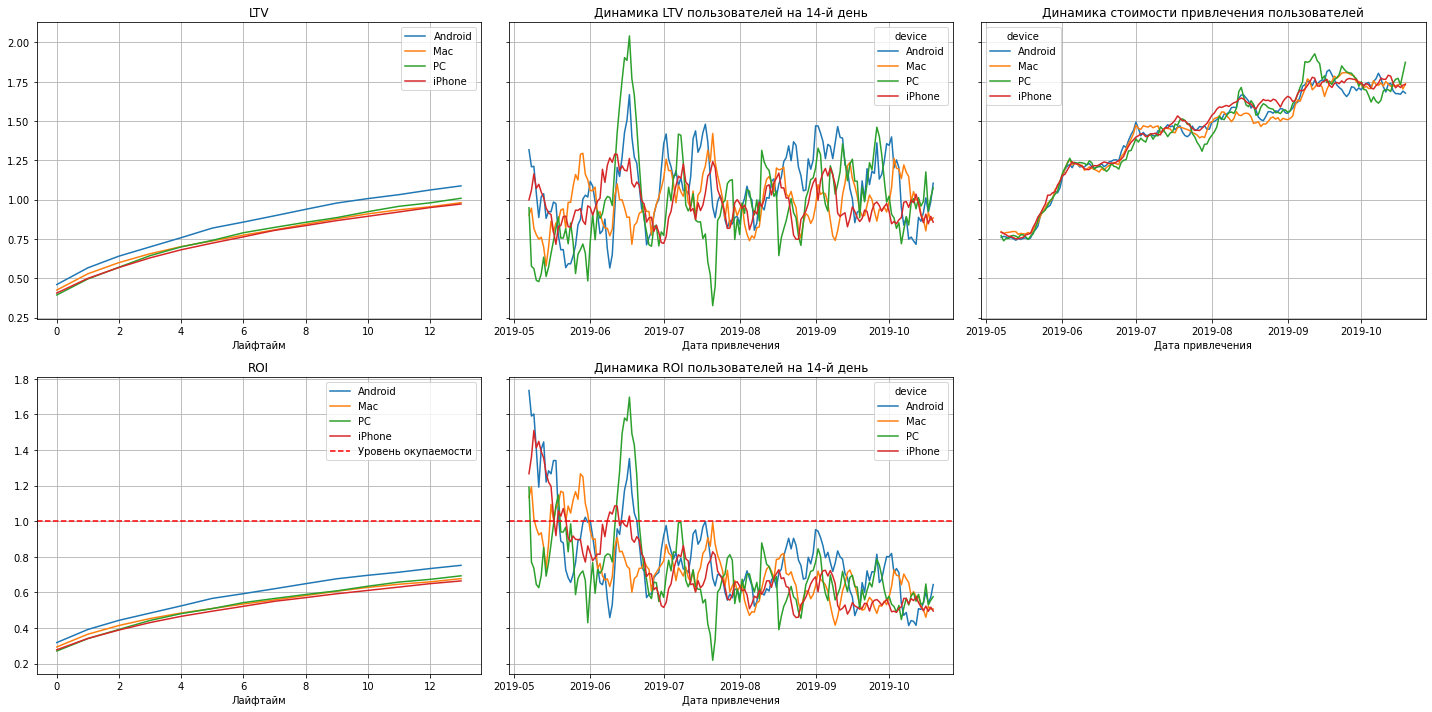

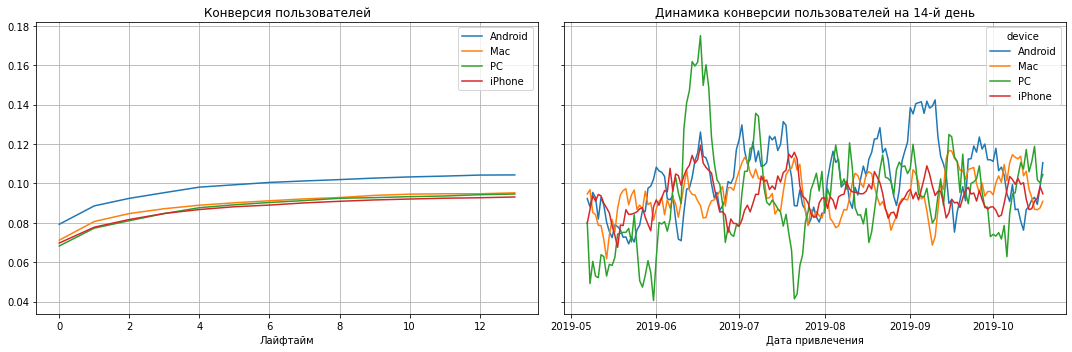

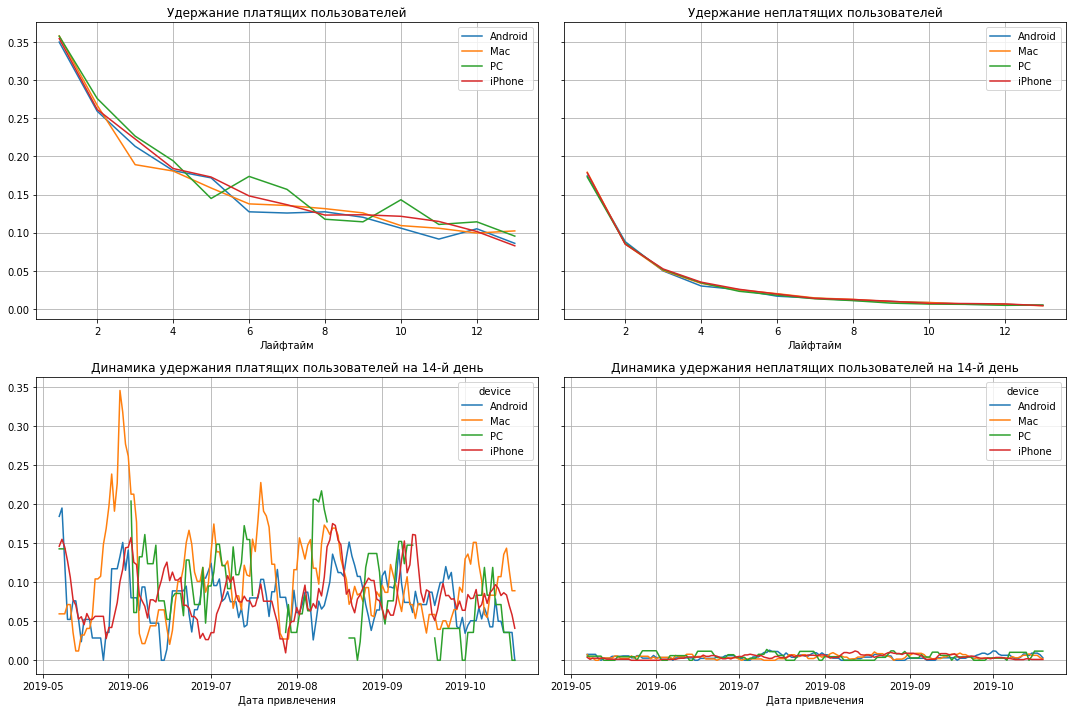

In [30]:
# Let's plot the same charts separately for the US market to find out what the problem is
profiles = profiles.query('region == "United States"')

# Analyzing the payback of advertising by device.
# I build LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs

# I build LTV and ROI graphs and LTV, CAC and ROI dynamics graphs
# calculating indicators
ltw_raw, ltw_grouped, ltw_history, roi_grouped, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device'])

# building charts
plot_ltv_roi(ltw_grouped, ltw_history, roi_grouped, roi_history, 14)

# I analyze conversion and retention by device.
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, 14)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, 14)

Nothing unusual

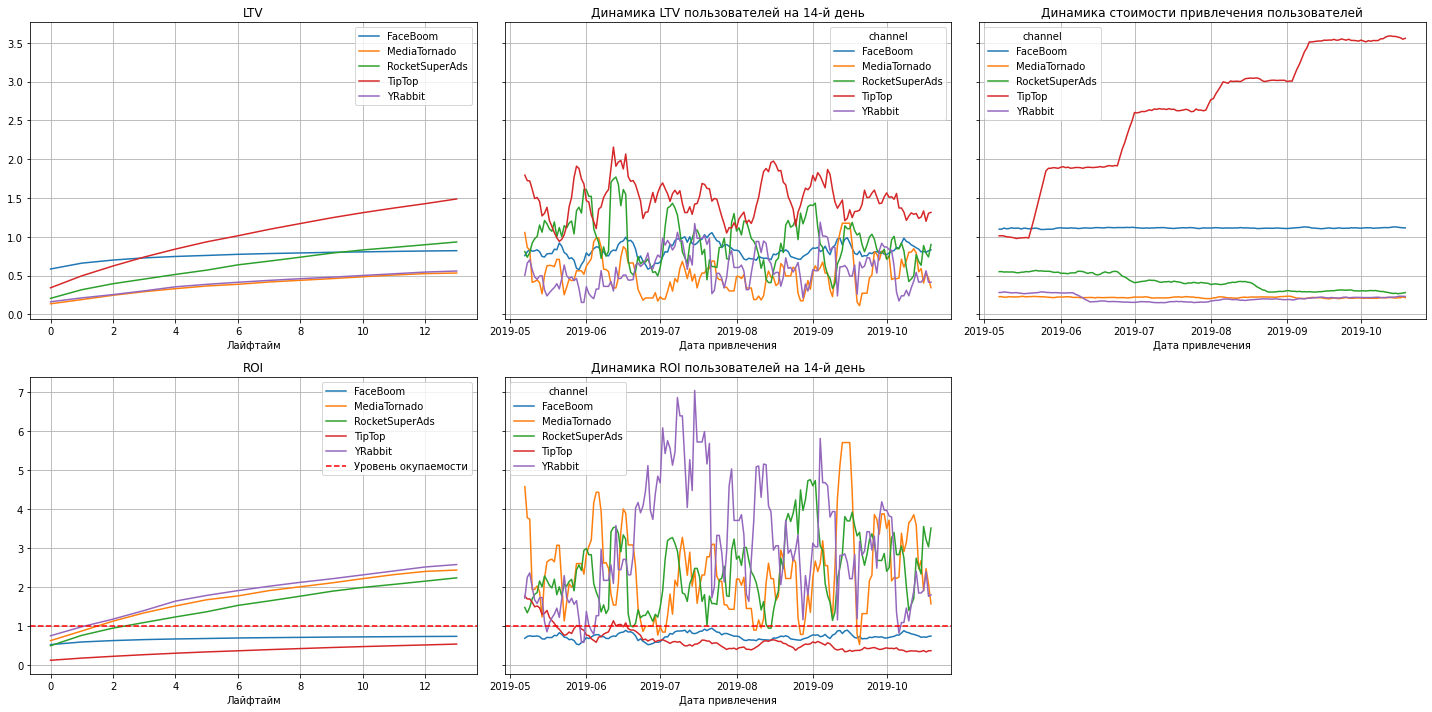

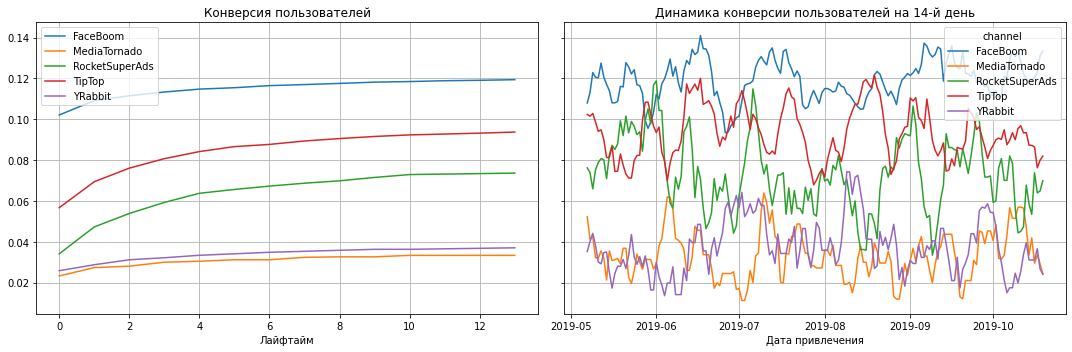

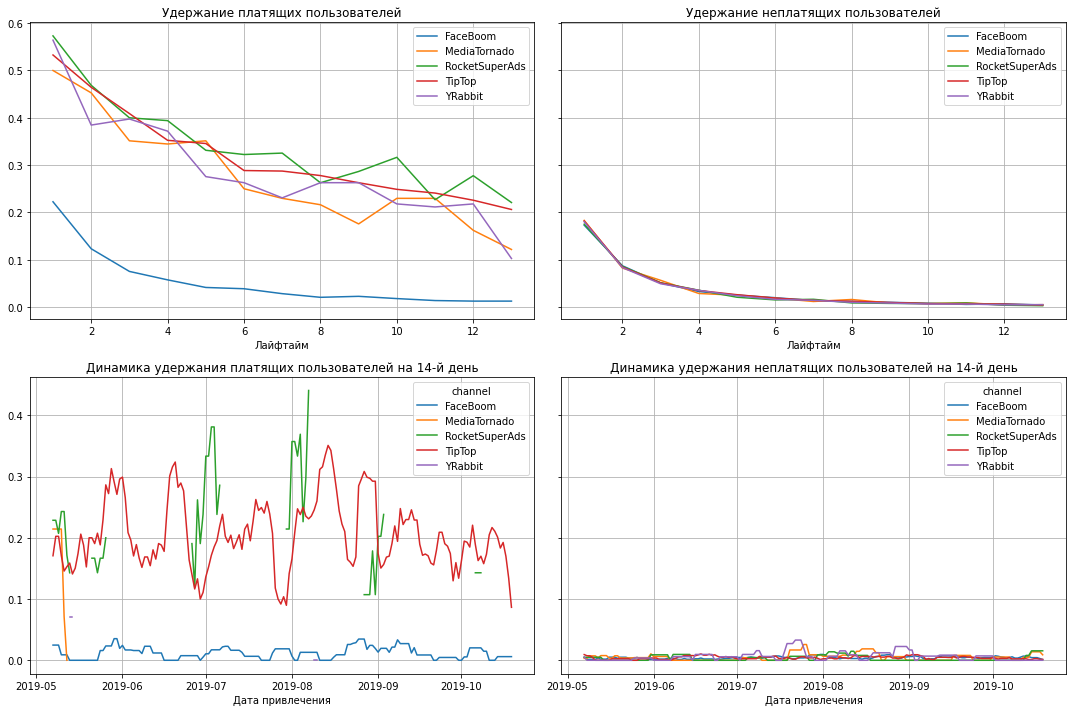

In [31]:
# Analyzing the payback of advertising by channel.
# I build LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs

# I build LTV and ROI graphs and LTV, CAC and ROI dynamics graphs
# calculating indicators
ltw_raw, ltw_grouped, ltw_history, roi_grouped, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

# building charts
plot_ltv_roi(ltw_grouped, ltw_history, roi_grouped, roi_history, 14)

# Analyze conversion and retention by channel.
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, 14)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, 14)

The problem with advertising in the US market: low retention of users from Facebook and expensive users in TipTop

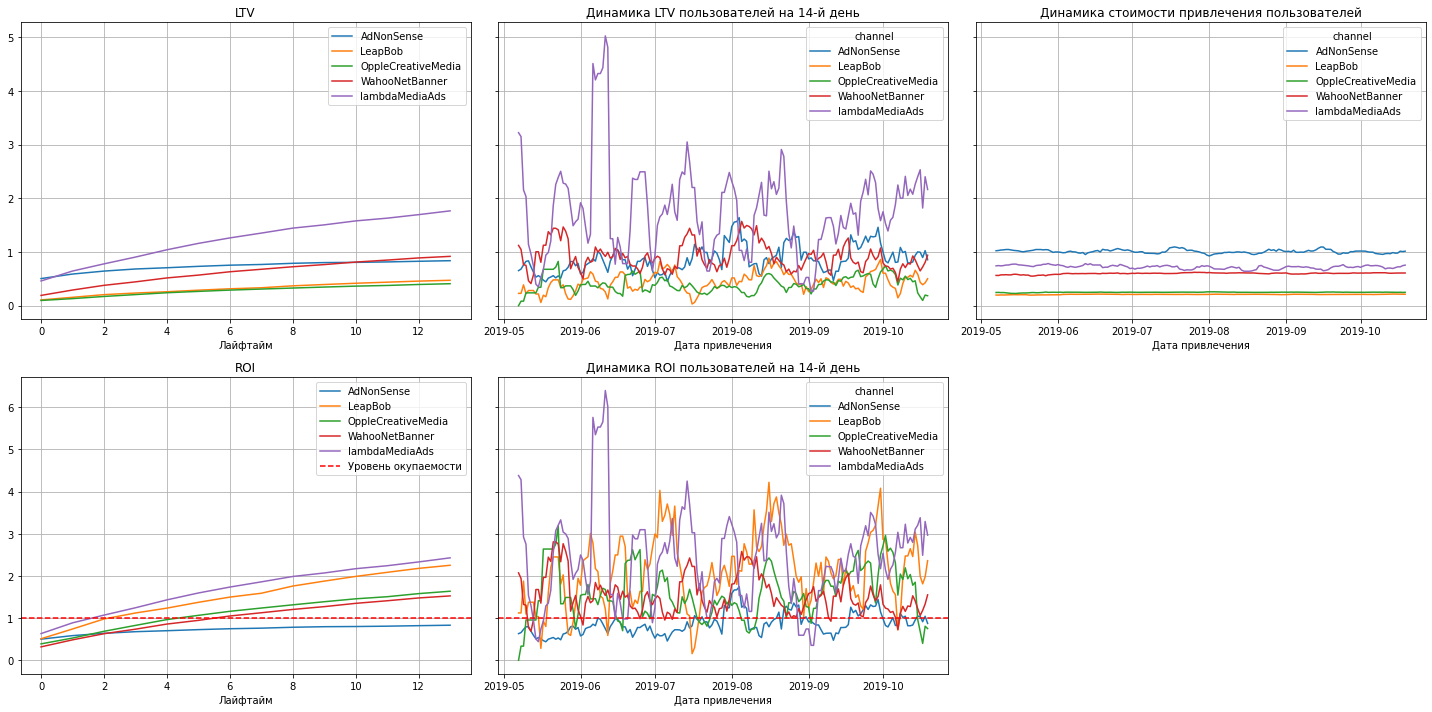

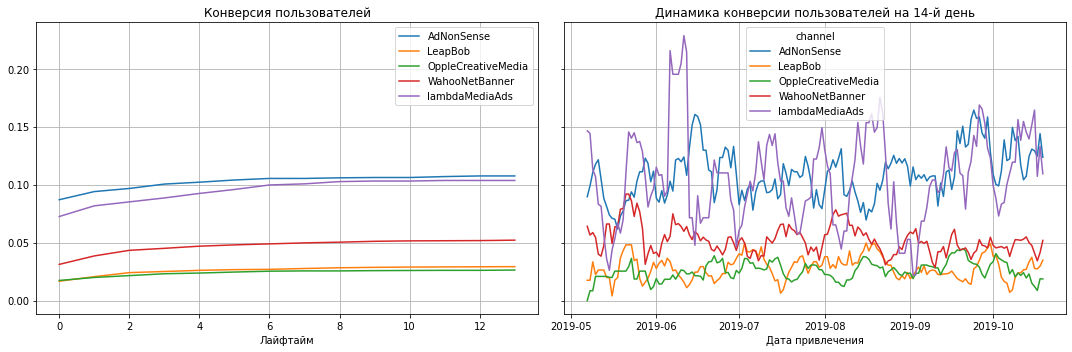

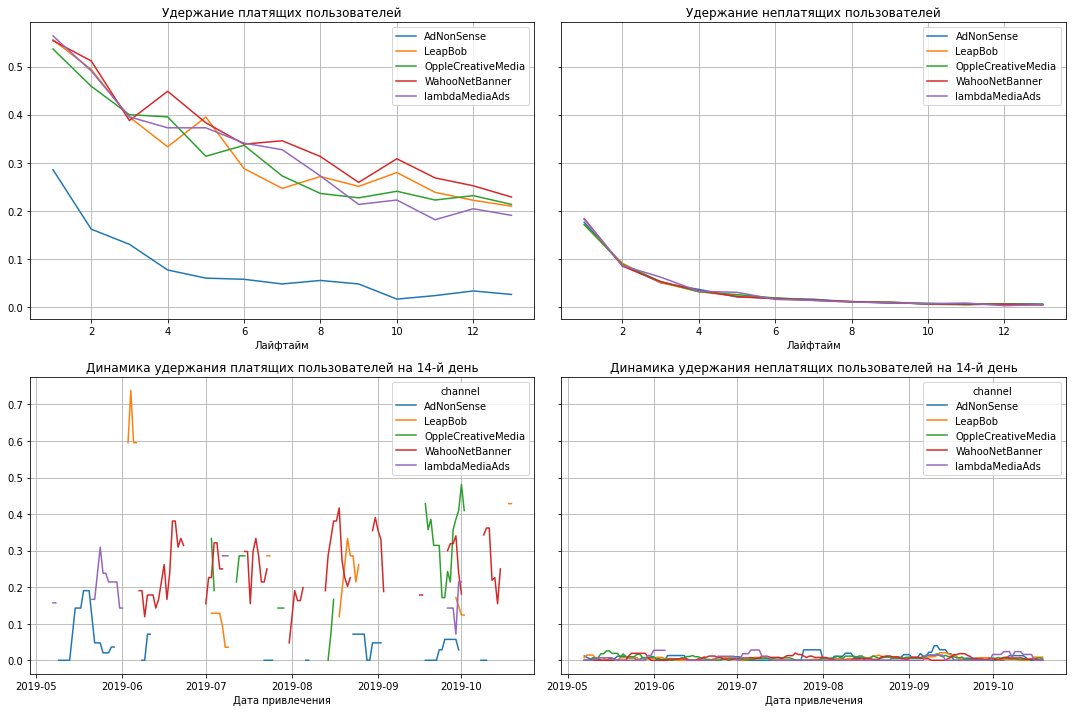

In [32]:
# let's look at the channels in europe
# Analyzing the payback of advertising by channel.
# I build LTV and ROI graphs, as well as LTV, CAC and ROI dynamics graphs
profiles = get_profiles(visits, orders, costs)

profiles = profiles.query('region != "United States" and channel != "organic"')

# I build LTV and ROI graphs and LTV, CAC and ROI dynamics graphs
# calculating indicators
ltw_raw, ltw_grouped, ltw_history, roi_grouped, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel'])

# building charts
plot_ltv_roi(ltw_grouped, ltw_history, roi_grouped, roi_history, 14)

# # Analyze conversion and retention by channel.
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, 14)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, 14)

<b>Reasons for inefficiency in attracting users:</b>
- Advertising in the USA: low retention of paying users from the Facebook channel
- Tip Top Channel: CAC Growth
- AdNonSense channel: low user retention
- reduced conversion of customers using PC
 


<<b>Recommendations:</b>
- increase the retention of paying users from the Facebook channel in the USA or redistribute its budget in favor of other channels
- redistribute the budget of the Tip Top channel in favor of other channels
- increase the conversion rate of PC users - add an activator on the site or find another way
- increase the advertising budget in Europe via lambda Media Ads and LeapBob channels, in the USA via YRabbit and MediaTornado (to increase the conversion rate according to the latter). Channels have a high ROI